<a href="https://www.kaggle.com/code/satyamsss/songs-analysis-with-word2vec-1950-2019?scriptVersionId=154193799" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/music-dataset-1950-to-2019/tcc_ceds_music.csv


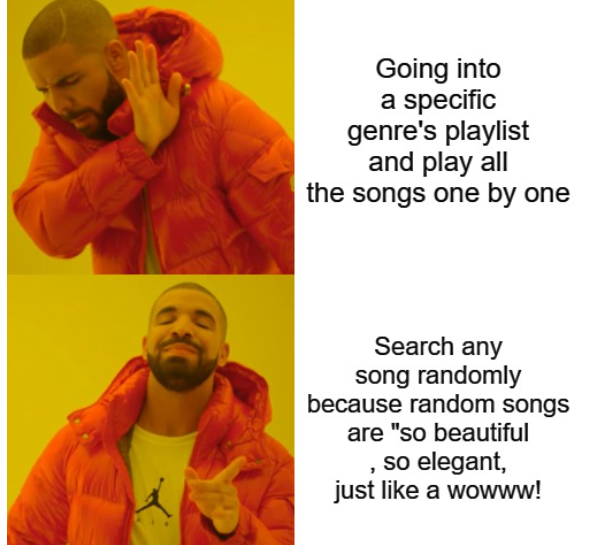

### Overview:
Come along on a journey through the world of music! This notebook is all about exploring different types of music to find out what makes each one special. We'll look at patterns and cool stuff in each genre. Plus, we're using smart tricks to sort out all the extra stuff and focus on what really matters in each type of music. It's going to be fun discovering what makes each genre unique!

### Objectives:
1. **Genre Profiling:** Profile different music genres based on key features like tempo, energy, instrumentalness, etc., exploring how these characteristics vary across genres.

2. **Temporal Trends:** Investigate how musical tastes have evolved over time within each genre, examining shifts in popularity, style, and influence.

3. **Genre Crossover:** Explore the concept of genre fusion and identify commonalities between seemingly disparate genres, potentially revealing emerging hybrid genres.

### **Lets start**

In [2]:
!pip install np_utils
!pip install nltk
!pip install langdetect
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=92d76936fbbaed8a753e20803ee1d21ca0e16a8568e9b6d58e820c4092e82686
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=dd255da93b2c863d8413b97a01692269ef6c406c8771ccae61b5ce7336e44278
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [3]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.path import Path

import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud
from langdetect import detect
from nltk.tokenize import sent_tokenize, word_tokenize
import regex as re

import np_utils

import tensorflow as tf
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU,ELU, ReLU, Dropout
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras import models

from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
df_songs = pd.read_csv('/kaggle/input/music-dataset-1950-to-2019/tcc_ceds_music.csv')

# Data Understanding📲

In [6]:
df_songs.head(5)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [7]:
 df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

* **No null values are present in the dataset**

In [8]:
# unique values in dataset
def unique_values(df):
    unique_values = []
    col_name = []
    null_values = []
    for col in df.columns:
        unique_values.append(df[col].nunique())
        col_name.append(col)
        null_values.append(df[col].isna().any())
    df_dict = {
        'Features' : col_name,
        'Unique values' : unique_values,
        'Contains Null' : null_values
    }
    return pd.DataFrame(df_dict, columns=['Features','Unique values','Contains Null'])

In [9]:
unique_values_songs = unique_values(df_songs)
unique_values_songs

,Features,Unique values,Contains Null
0,Unnamed: 0,28372,False
1,artist_name,5426,False
2,track_name,23689,False
3,release_date,70,False
4,genre,7,False
5,lyrics,28372,False
6,len,199,False
7,dating,27918,False
8,violence,28189,False
9,world/life,28195,False


**There is no such categorical feature in the dataframe**<br>
**Column named as 'Loudnes (dB)' is the only column has minimum 23 unique values**

# Data visualization📊

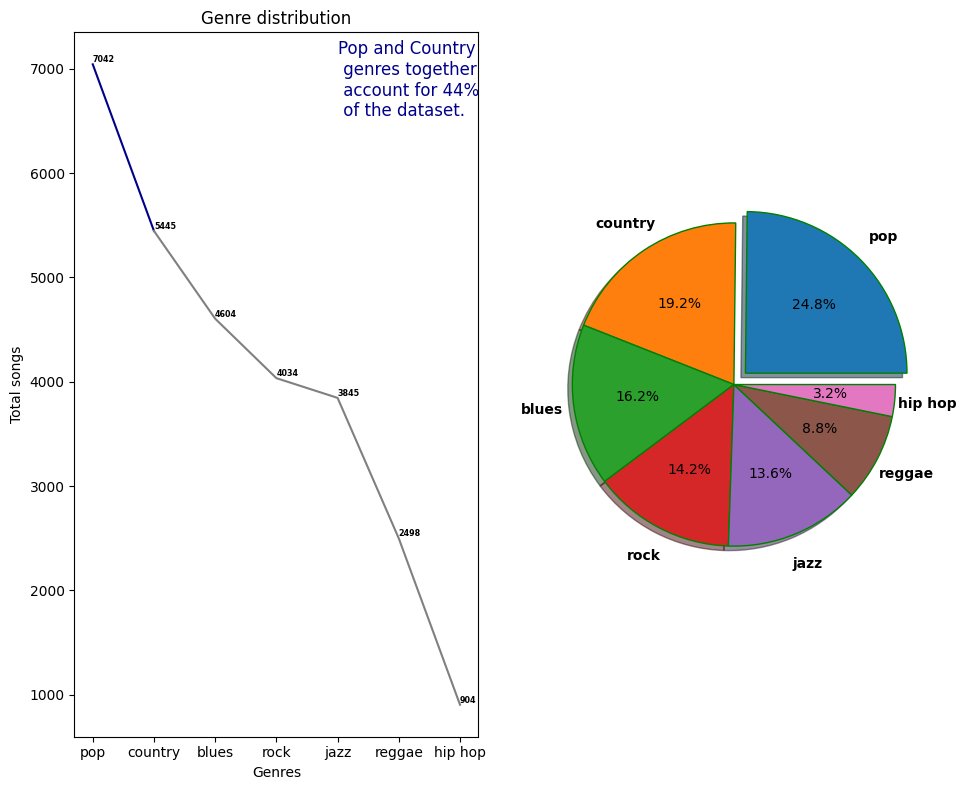

In [10]:
# Genre wise distribution
fig, axes = plt.subplots(1,2, figsize=(10,8))
genres= df_songs['genre'].value_counts()
label=df_songs['topic'].value_counts().values
highlight_start = 0
highlight_end = 1

# Plotting the line plot segments with different colors
# Segment 1 (before yellow section)
axes[0].plot(genres.index[:highlight_start], genres.values[:highlight_start], color='gray')

# Segment 2 (yellow section)
axes[0].plot(genres.index[highlight_start:highlight_end + 1], genres.values[highlight_start:highlight_end + 1], color='darkblue')

# Segment 3 (after yellow section)
axes[0].plot(genres.index[highlight_end:], genres.values[highlight_end:], color='gray')

# pie plot

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct)
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
patches, texts, autotexts = axes[1].pie(genres.values, labels=genres.index.values,
                            autopct=lambda pct : func(pct,genres.values),
                            explode = (0.1,0.0,0.0,0.0,0.0,0.0,0.0),
                            shadow=True,
                            wedgeprops=wp,
                                       labeldistance=1.2)
# Example: Set the fontsize for better visibility 

axes[0].set_ylabel('Total songs')
axes[0].set_xlabel('Genres')
axes[0].set_title('Genre distribution')
plt.tight_layout()

#add text
for x, y in zip(genres.index, genres.values):
    axes[0].text(x, y, f'{y}', ha='left', va='bottom',fontsize='xx-small',stretch = 'expanded',fontweight='semibold') 
    
for text in texts:
    text.set_fontweight('bold')
    text.set_horizontalalignment('center')
    
# add text
axes[0].text('jazz', 6890, 'Pop and Country\n genres together\n account for 44%\n of the dataset.', ha='left', va='center', fontsize=12,color='darkblue')
plt.show()

**Interpretations**
1. Data is **Unbiased** in genres, **pop** and **country** contributes 44% of all the dataset

In [11]:
df_songs.drop('Unnamed: 0',axis=1,inplace=True)

## Genres in Number

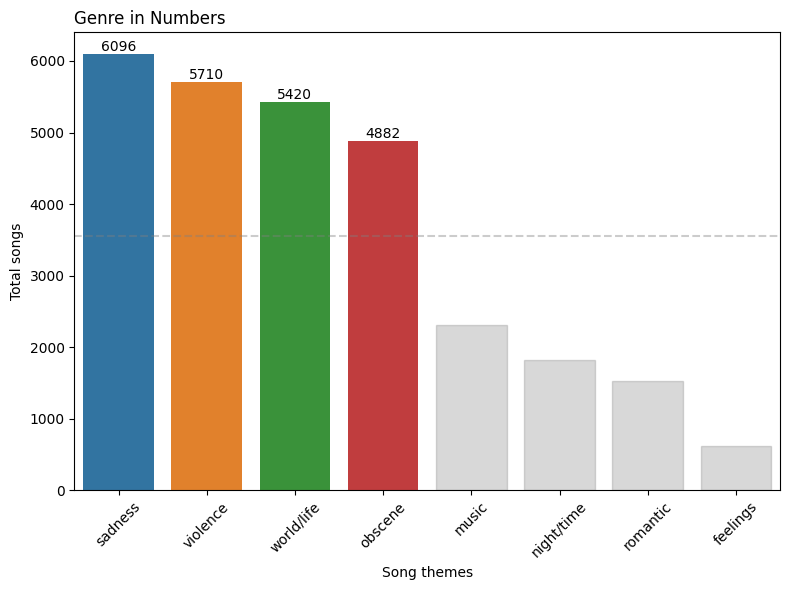

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_songs' and want to plot the count of each genre
plt.figure(figsize=(8, 6))
g = sns.countplot(data=df_songs, x='topic', order=df_songs['topic'].value_counts().index)


# Adding labels and title
plt.xlabel('Song themes')
plt.ylabel('Total songs')
plt.title('Genre in Numbers', loc='left')

# mean value
mean =df_songs['topic'].value_counts().mean()

# adding mean horizontal line
g.axhline(y = mean, alpha = 0.4,c='gray',linestyle='--',label='mean')


# ignoring color for lower last four bars
for i, bar in enumerate(g.patches):
    if i >= 4:  # Excluding top four bars
        bar.set_color('gray')
        bar.set_alpha(0.3)
    if i < 4:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')



# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


1. **Among theme of songs, sadness and violence are two topics which are most popular**
2. **Romantic and feelings are not in trend**

## Trend from last 60 years

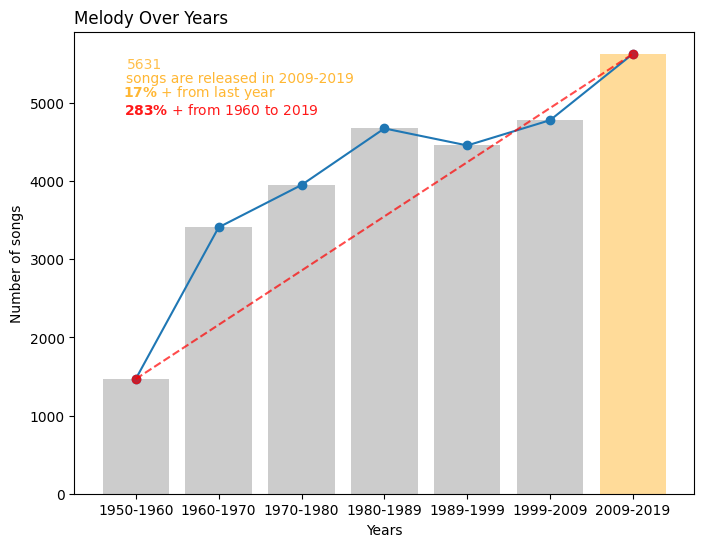

In [13]:
# Create interval
df_songs['year_range']=pd.cut(df_songs['release_date'], bins=7,precision=0)

# grouping with time range
year_range=df_songs.groupby('year_range').count()[['topic']].index
# convert year range into string
interval=[]
for i,one_range in enumerate(year_range):
    interval.append(f"{int(one_range.left)}-{int(one_range.right)}")

songs_in_year = df_songs.groupby('year_range').count()[['topic']].values.ravel()

# plotting
figsize=plt.subplots(figsize=(8,6))
bar_colors = ['gray'] * (len(interval) - 1) + ['orange']
plt.plot(interval,songs_in_year, marker='o', )
plt.bar(interval,songs_in_year,align='center',color=bar_colors,alpha= 0.4)
plt.ylabel('Number of songs')
plt.xlabel('Years')
plt.title('Melody Over Years',loc='left')
plt.text(0.451, 0.89, 'songs are released in 2009-2019', color='orange', alpha=0.8,transform=plt.gca().transAxes  ,ha='right',fontsize=10)
plt.text(0.325, 0.86, r'$\bf{17\%}$ + from last year', color='orange', alpha=0.8, transform=plt.gca().transAxes, ha='right')
plt.text(0.0807, 0.82, r'$\bf{283\%}$ + from 1960 to 2019', color='red', alpha=0.9,transform=plt.gca().transAxes  ,ha='left',fontsize=10)
plt.text(0.084, 0.92, '5631', color='orange', alpha=0.7,transform=plt.gca().transAxes  ,ha='left',fontsize=10)


# curve plotting
x_vals = [0, len(interval) - 1]  # X-coordinates for the curve (first and last bars)
y_vals = [songs_in_year[0], songs_in_year[-1]]  # Y-coordinates for the curve (heights of first and last bars)

plt.plot(x_vals, y_vals, marker='o', linestyle='--', color='red', alpha=0.7)
# 5631


1. **Data of songs will see the upcoming trend in upcoming years**
2. **Second sharpest increment from 1999-2009 to 2009-2029 after 1960 to 1970**

In [14]:
## Preserving our old datset
df_range = df_songs.copy()

### Top Genres popularity over the years

In [15]:
# create some intervals, set bins of length 8
bins = [1950, 1965,1980,1995,2010,2019]
# when binning with left interval open
print(pd.cut(df_range['release_date'], bins).isnull().sum())
print(pd.cut(df_range['release_date'], bins, right=False).isnull().sum())

51
534


***Will include right interval to avoid loosing much information from the dataset***

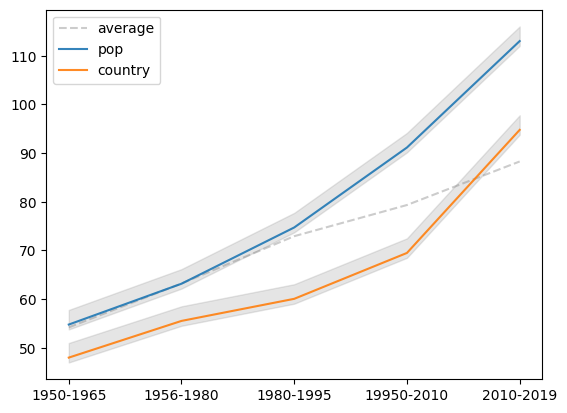

In [16]:
df_range['time_interval'] = pd.cut(df_range['release_date'], bins , right=True)
grouped_with_time_range = df_range.groupby('time_interval')['len'].mean()
values = grouped_with_time_range.values
intervals = ['1950-1965','1956-1980','1980-1995','19950-2010','2010-2019']
plt.plot(intervals, values, c='gray',linestyle='--',label='average',alpha=0.4,fillstyle='full')
plt.legend({'average' : label})

# plotting top genres from the dataset
genres = ['pop','country']
for genre in genres:
    filtered_df = df_range[df_range['genre'] == genre]
    grouped_with_time=filtered_df.groupby('time_interval')['len'].mean()
    values = grouped_with_time.values
    plt.plot(intervals, values ,linestyle='-', alpha=0.9,label=genre)
    plt.fill_between(intervals, values-1, values + 3, color='gray', alpha=0.2)
plt.legend()


1. **Trend says the length of songs is keep on increasingly (On average)**
2. **genre 'Pop' has majority in the datset, For this reason pop songs length is much larger than the average**

### Themes over Genre

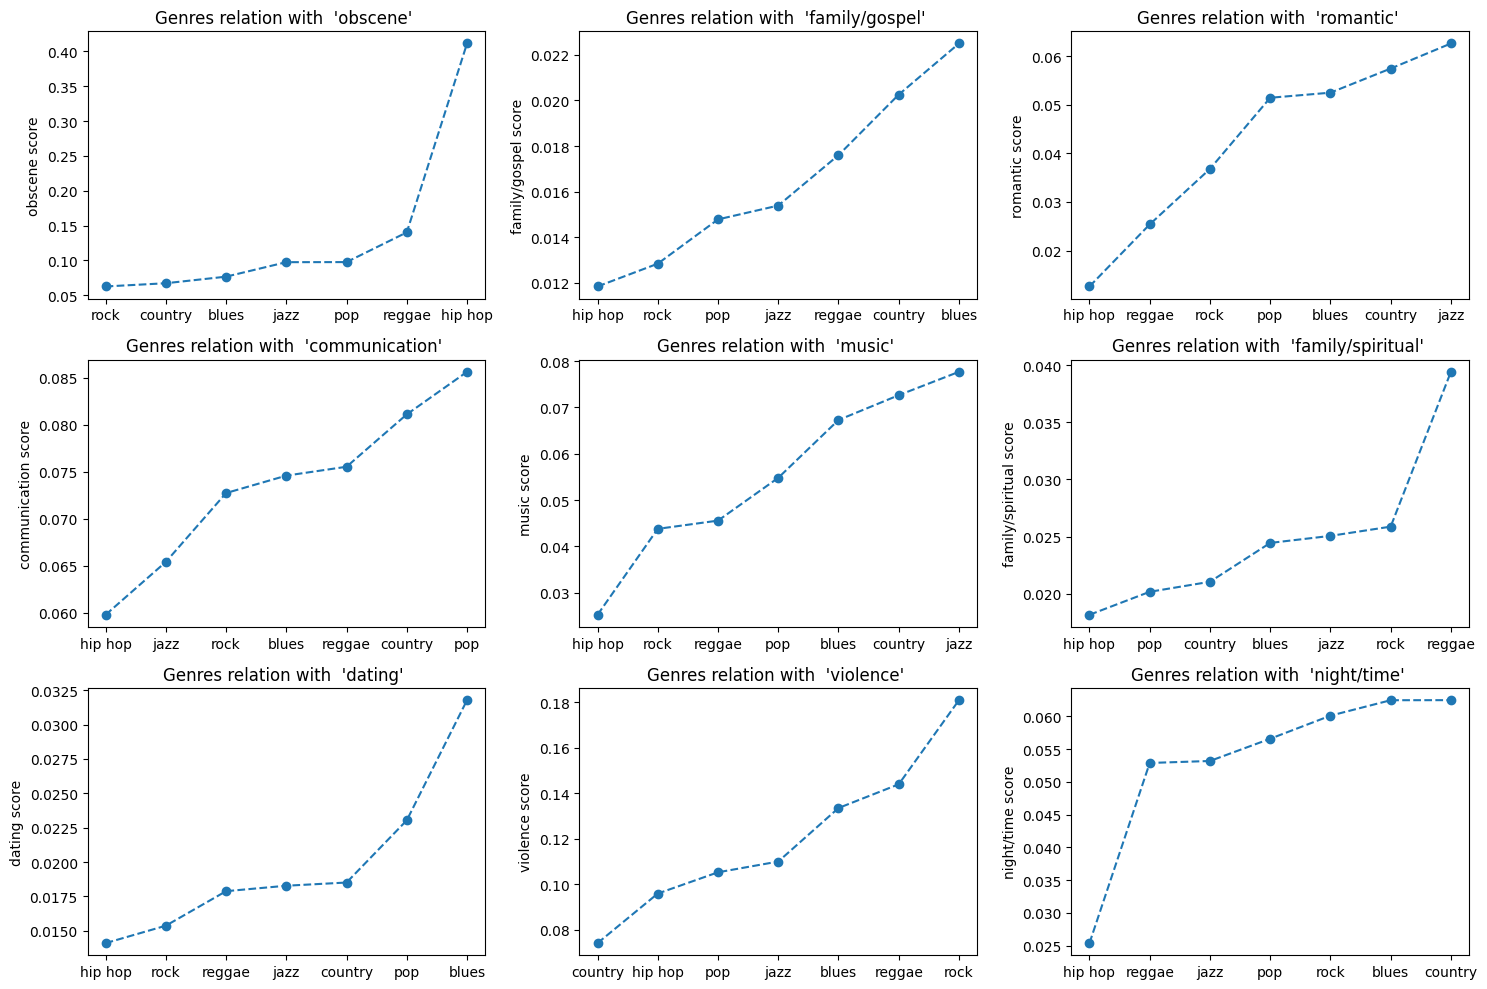

In [17]:
# lets analyse how genre show dependency on featurs

# setting up figure , and subplots
fig, axes = plt.subplots(3,3, figsize=(15,10))
types = ['obscene', 'family/gospel','romantic','communication','music','family/spiritual','dating','violence','night/time']

for i,feature in enumerate(types):
    row , col = i//3 , i%3
    genre = df_range.groupby('genre')[feature].mean().sort_values().index
    values = df_range.groupby('genre')[feature].mean().sort_values().values
    axes[row,col].plot(genre, values,marker='o', linestyle='--')
    axes[row,col].set_title("Genres relation with  '{}' ".format(feature))
    axes[row,col].set_ylabel('{} score'.format(feature))
plt.tight_layout()

**By visualizing some of the graphs we can come up with such interpretations like -**
1. one genre can shows many themes simultaneously like Who knows **blues**( kind of religious category in US) helps in *matching pairs*💘 and gives high score to family/gospel score.
2. Mostly **Hip-hop** songs promotes obscence environment, (Isn't that obvious🤐, our indian songs)
3. Last obvious interpretation - **Rock** music spread violence (Ohhh! that's why those crazy band peoples🎸 get mad in front of the mic)


## Correlation between features

<Axes: >

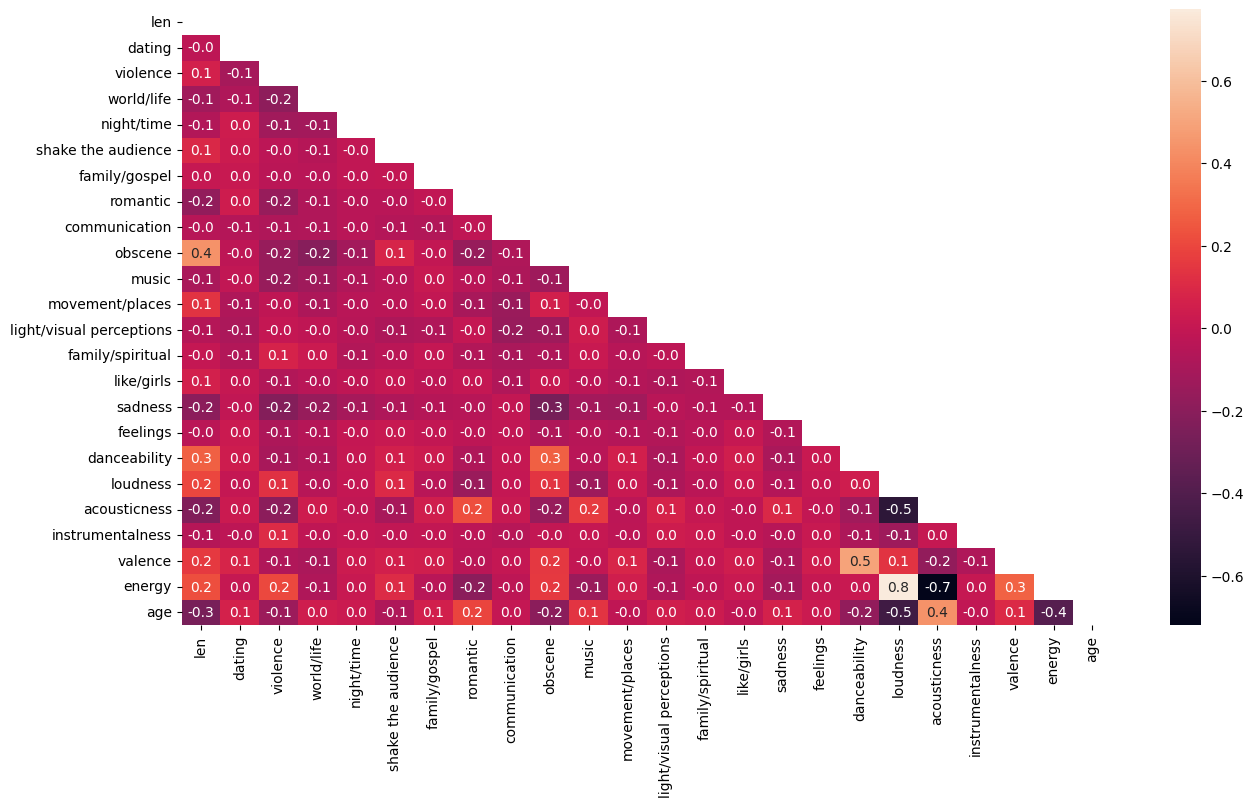

In [18]:
# Extracting only numerical features for correlation
X_numeric=df_range.iloc[:,5:30]
X_numeric = X_numeric.drop('topic',axis=1)

# # compute the correlation matrix
numeric_corr = X_numeric.corr()

# # Generatae a mask for upper triangle
mask = np.triu(np.ones_like(numeric_corr, dtype=bool))

# increase figisze
figure, ax = plt.subplots(figsize=(15,8))
sns.heatmap(
data = numeric_corr, mask = mask, annot=True, fmt='0.1f')

**Interpretations**
1. Almost every features are showing not such good *magnitude* of  correlation with each other
2. **loudness** and **acousticness** shows strong *positive* and *negative* correlation wrt energy feature
##### What will be our next step?
* Representing the correlations of independent variables was just the part of our *curiocity*.
* Feeding all these features (seems unnecessary for the time being), and can cause **overfitting** issue in the model
* **We will be predicting *genre* of the songs by its only feature which is 'lyrics'**

In [19]:
# splitting into input feature and output feature
df = df_range.loc[:,['lyrics','genre']]
print('Shape- {}'.format(df.shape))
print('Columns in final dataframe {}'.format(df.columns))

Shape- (28372, 2)
Columns in final dataframe Index(['lyrics', 'genre'], dtype='object')


# Data Cleaning and Preprocessing🧹

Why do we need here?<BR>
* *The pupose is not ambiguous,the only reason is- <br>**In our dataset some lyrics are found in different language**.*


## **Data cleaning begins--------**

### 1. Expand contraction

In [20]:
# expand contraction convertor
def expand_contractions_filter_1(text):
    # Define contraction patterns and their corresponding expansions
    contractions = {
    r"won't": "will not",
    r"can't": "can not",
    r"n't": " not",
    r"'re": " are",
    r"'s": " is",
    r"'d": " would",
    r"'ll": " will",
    r"'ve": " have"
  }
    for pattern, replacement in contractions.items():
        text = re.sub(pattern, replacement, text)
    return text
    
    

### 2. Remove special characters

In [21]:
#removes [^A-Za-z0-9] removes the part that matches any character other than
#removes stop_words
text_cleaning = "\b0\S*|\b[^A-Za-z0-9]+"
stop_words = stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer

def preprocess_filter_2(text, stem=False):
  text = re.sub(text_cleaning, " ",str(text.lower()).strip())
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        stemmer = SnowballStemmer(language='english')
        token = stemmer.stem(token)
      tokens.append(token)
  return " ".join(tokens)

In [22]:
print(preprocess_filter_2(df_range['lyrics'][0], stem=True))

hold time feel break feel untru convinc speak voic tear tri hold hurt tri forgiv okay play break string feel heart want feel tell real truth hurt lie wors anymor littl turn dust play hous ruin run leav save like chase train late late tear tri hold hurt tri forgiv okay play break string feel heart want feel tell real truth hurt lie wors anymor littl run leav save like chase train know late late play break string feel heart want feel tell real truth hurt lie wors anymor littl know littl hold time feel


In [23]:
print(preprocess_filter_2(df_range['lyrics'][0], stem=False))

hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel


**By analysing above preprocess method's filter (Stemming) we get these findings - 
1. Several words in the document have changed, altering their intended meaning.
2. Example - **convince** converted into **convinc**, **try** converted into **tri**
3. Songs usually uses *slang* language like going to -->> **going to**, convert into **gonna**. Applying stemming will just increase the problem of **OOV(out out vocabulary)**

### 3. Correcting Repeating Characters

In [24]:
def remove_repeated_character_filter_3(text):
    filtered_word = []
    tokens= word_tokenize(text)
    def stop_repeating(old_word):
        repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
        match_substitution = r'\1\2\3'
        step = 1
        while True:
            new_word = repeat_pattern.sub(match_substitution,old_word)
            if new_word != old_word:
                step+=1
                # change old_word with last substituted stage
                old_word = new_word
                continue
            else:
                return new_word
    for token in tokens:
        filtered_word.append(stop_repeating(token))
    return " ".join(filtered_word)

In [25]:
remove_repeated_character_filter_3('heloo the wayyy are goinngg right now itsss awesome aaaha moment, boom')

'helo the way are going right now its awesome aha moment , bom'

In [26]:
remove_repeated_character_filter_3('Priority gets changed meanwhile This is kaggle notebook if you like it then please upvote')

'Priority gets changed meanwhile This is kagle notebok if you like it then please upvote'

**Interpretations**
1. In first example almost all the repeated characters in the sentences gets replaced by the normal word, but function removes the repeated character even in acutal meaning full word, ex,  **boom** converted into **bom**

### 4. Sample extraction

In [27]:
# Extracting out sample, processing on whole dataset (28K rows) will be time taking

# # Let give user option if he wants to train on whole dataset
def take_out_your_sample_filter_4(df, rows:int,sample=True):  
    if sample:
        sampler = np.random.permutation(rows)
        df = df.take(sampler)
        final_df =df.reset_index().drop(['index'], axis=1)
        return final_df
    else:
        return df

### 5. Removing non english letters

In [28]:
def only_english_lyrics_filter_5(df):
    def english_language_filter(text)-> bool:
        try:
            return detect(text) == 'en'
        except:
            return False
    return df.loc[df['lyrics'].apply(english_language_filter)]


### 6. Removing symbols in between

In [29]:
def filter_symbols_between_words_filer_6(text):
    pattern = r'(?<=\b\w+)\W+(?=\w+\b)'
    filtered_text = re.sub(pattern, ' ', text)
    return filtered_text

* **Reason to add this filter is that many symbols are found in between the word instead in starting and ending, So this function can take care of that**

## Setting up pipeline for cleaning the text💈

In [30]:
def Preprocessing_pipeline(df, rows: int,sample = False):
    
    # dataframe related functions
    english_language_filtered_df = only_english_lyrics_filter_5(df)
    extracted_df = take_out_your_sample_filter_4(english_language_filtered_df, rows,sample)
    
    # Functions to apply using a loop
    functions_to_apply = [expand_contractions_filter_1, preprocess_filter_2,filter_symbols_between_words_filer_6, remove_repeated_character_filter_3]
    for func in functions_to_apply:
        extracted_df['lyrics'] = extracted_df['lyrics'].apply(func)
    
    return extracted_df


## **Data cleaning Ends----------**

In [31]:
# Due to limitaiton on processing power
%time
df_processed = Preprocessing_pipeline(df,20000,sample=True)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


### Preparing dataset

In [32]:
len(df_processed)

20000

In [33]:
X=df_processed.loc[:,['lyrics']]
y = df_processed.loc[:,['genre']]

In [34]:
y['genre'].value_counts()

genre
pop        6839
country    5359
blues      4447
jazz       3355
Name: count, dtype: int64

# Feature Extraction (text representation)

## Most frequent words in songs

In [35]:
def most_frequent_words(x:str, top_most:int):
    # Split the text into sentences
#     sentences = sent_tokenize(x)
    
#     # Filter out non-English sentences
#     english_sentences = [sentence for sentence in sentences if english_language_filter(sentence)]
    
#     # Combine English sentences into a single text block
#     english_text = ' '.join(english_sentences)
    
    # Tokenize the English text
    tokens = word_tokenize(x)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if word.lower() not in stop_words]
    
    # Get word frequency
    frequency_dictionary = Counter(filtered_words)
    return frequency_dictionary.most_common(top_most)



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


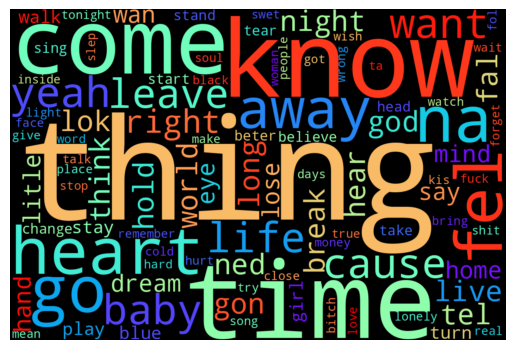

In [36]:
# implementation
%time
tons_of_text = ' '.join(X['lyrics'])
top_50_words = most_frequent_words(tons_of_text, 100)
top_used_words = []
for tuple_word in top_50_words:
    top_used_words.append(tuple_word[0])
words = ' '.join(top_used_words)

# Generate word cloud
word_cloud = WordCloud(width=1200, height=800,colormap='rainbow',collocations=False).generate(words)
## image showing
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Text vectorization 🏗️ [Gensim - Doc2vec] 

In [37]:
!pip install --upgrade smart_open gensim

  Obtaining dependency information for smart_open from https://files.pythonhosted.org/packages/fc/d9/d97f1db64b09278aba64e8c81b5d322d436132df5741c518f3823824fae0/smart_open-6.4.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: smart_open
    Found existing installation: smart-open 6.3.0
    Uninstalling smart-open-6.3.0:
      Successfully uninstalled smart-open-6.3.0


In [38]:
!pip install gensim -U

In [39]:
# Preparing input for Doc2vec
def into_list(df,column):
    x =list(df[column].values)
    return x

In [40]:
# Model building 
# Set default vector_size = 150
def word_to_vec(input_list:list, output_list:list,vector_size=150, min_count = 5, epochs =40):
    tagged_data = [TaggedDocument(words = input_column, tags=[output_column]) for input_column , output_column, in zip(input_list, output_list)]
    model =Doc2Vec(vector_size =vector_size, min_count = min_count, epochs = epochs)
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count,epochs=model.epochs)
    return model
    

In [41]:
def infer_vector(model, text):
    return model.infer_vector([text])


In [42]:
# Setting up pipeline
X_list = into_list(X,'lyrics')
y_list = into_list(y,'genre')
model = word_to_vec(X_list,y_list,vector_size=8000,epochs=30)

In [43]:
def Predict_genre(model,text):
    text_vector = infer_vector(model, text)
    return model.dv.most_similar([text_vector],topn = 1)[0][0]

text = "How many roads must a man walk down Before you call him a man? How many seas must a white dove sail Before she sleeps in the sand? Yes, and how many times must the cannonballs fly Before they're forever banned?"
Predict_genre(model,text)

'blues'

**If you're a fellow data enthusiast or a budding data scientist, let's connect! Explore more end-to-end machine learning projects on my GitHub [here](https://github.com/codedestructed007). I'd love to collaborate and share insights. Take care and happy exploring!
Thank you for your time❣️**